In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\c desktop data\Python\linear_regression\archive (2)\student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Check if there are any empty cells in the dataset
print("Missing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
# Some columns have text data like 'F' or 'M', 'GP' or 'MS', etc.
# We need to convert those into numbers so the model can understand them

label_encoder = LabelEncoder()

# Go through each column that has text (object type), and convert to numbers
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Show the first few rows again to see changes
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# The feature we want to predict is the final grade (G3)
# So we separate it from the other columns

X = df.drop('G3', axis=1)  # All columns except G3
y = df['G3']               # Only G3 column


In [7]:
# Split the data into 80% for training and 20% for testing
# This helps us check how well the model works on new data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [8]:
# Create the model and train it with our training data
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)


In [9]:
# These are common metrics to check how good our model is

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R2 Score (Accuracy):", round(r2, 2))


Model Evaluation Results:
Mean Absolute Error (MAE): 1.34
Mean Squared Error (MSE): 3.6
R2 Score (Accuracy): 0.74


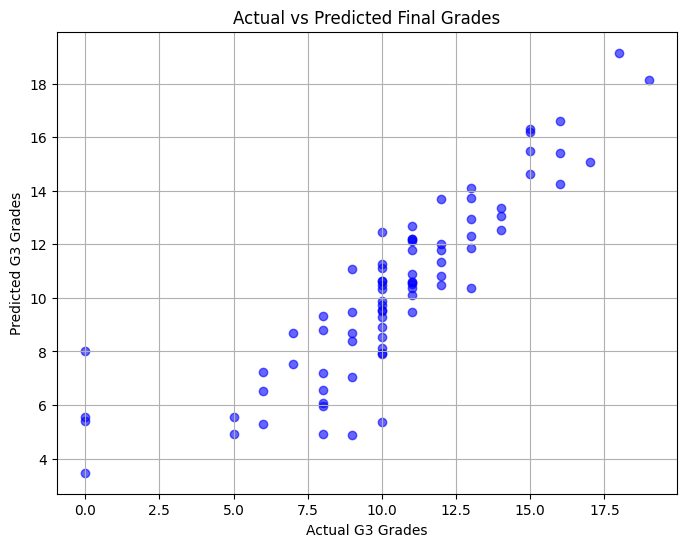

In [13]:
# Plot using only matplotlib (no seaborn)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual G3 Grades")
plt.ylabel("Predicted G3 Grades")
plt.title("Actual vs Predicted Final Grades")
plt.grid(True)
plt.show()
